## Start importing libraries

In [1]:
# Global
import tqdm
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# Local
import examples_utils as eu
import fastPTA.utils as ut
from fastPTA.plotting_functions import my_colormap
from fastPTA.Fisher_code import compute_fisher
from fastPTA.signals import get_signal_model

## Constants to be used in the analysis

In [2]:
# Total observation time in years
T_obs_yrs = 10.33

# Number of frequencies used in the analysis
n_frequencies = 100

# Specify the type of noise to be used in the analysis
which_experiment = eu.EPTAlike
which_experiment_label = "EPTA"

# Set the label to specify the signal model
signal_label = "power_law_SIGW"

# Current SMBBH SGWB best-fit paramteres
SMBBH_log_amplitude = -7.1995 #This will be varied
SMBBH_tilt = 2

# The analysis assumes a SIGW template, specify here the input parameters
SIGW_log_amplitude = -1.7
SIGW_log_width = np.log10(0.5)
SIGW_log_pivot = -7.8

# Specify the true signal parameters
SMBBH_parameters = jnp.array(
    [SMBBH_log_amplitude, SMBBH_tilt]
)

CGW_SIGW_parameters = jnp.array(
    [SIGW_log_amplitude, SIGW_log_width, SIGW_log_pivot]
)

signal_parameters = np.concatenate(
    [SMBBH_parameters, CGW_SIGW_parameters]
)

# Specify the labels for the signal parameters
parameter_labels = []

# Number of points to generate for the Fisher
len_fisher_data = int(1e4)

# Define a vector of N_pulsar
pulsar_range = np.rint(np.logspace(np.log10(25), np.log10(500), 20)).astype(int)

## Set the inputs for the Fisher analysis

In [4]:
# Get the signal model
signal_model = get_signal_model(signal_label)

# Dictionaries with the kwargs to generate noise and orf tensors
get_tensors_kwargs = {
    "add_curn": False,
    "regenerate_catalog": True,
    "path_to_pulsar_catalog": "pulsar_configurations/EPTA",
}

# Dictionary with the kwargs for the Fisher matrix
fisher_kwargs = {
    "T_obs_yrs": T_obs_yrs,
    "n_frequencies": n_frequencies,
    "signal_model": signal_model,
    "signal_parameters": signal_parameters,
}

# Flag to regenerate all the data
regenerate_data = True

## Compute Fisher errors for 10 realizations, varying  $N_p$ 

In [5]:
if regenerate_data:
    signal_parameters[0] = -7 #alpha_PL is varied within the 1sigma interval
    fisher_68max = np.zeros(shape=(10,len(pulsar_range), len(signal_model.parameter_names)))
    for i in tqdm.tqdm(range(10)): 
        for j in range(len(pulsar_range)):
            generate_catalog_kwargs={
            "n_pulsars": pulsar_range[j],
            "save_catalog": False,
            **which_experiment,
            }
            fisher_kwargs = {
                "T_obs_yrs": T_obs_yrs,
                "n_frequencies": n_frequencies,
                "signal_model": signal_model,
                "signal_parameters": signal_parameters
            }
            (
                frequency,
                signal,
                HD_functions_IJ,
                HD_coeffs,
                effective_noise,
                SNR,
                fisher,
            ) = compute_fisher(
                **fisher_kwargs,
                get_tensors_kwargs=get_tensors_kwargs,
                generate_catalog_kwargs=generate_catalog_kwargs,
            )
            covariance = ut.compute_inverse(fisher)
            for k in range(len(signal_model.parameter_names)):
                fisher_68max[i, j, k] = np.sqrt(np.diag(covariance)[k])

    signal_parameters[0] = -7.6
    fisher_68min = np.zeros(shape=(10,len(pulsar_range), len(signal_model.parameter_names)))
    for i in tqdm.tqdm(range(10)): 
        for j in range(len(pulsar_range)):
            generate_catalog_kwargs={
            "n_pulsars": pulsar_range[j],
            "save_catalog": False,
            **which_experiment,
            }
            fisher_kwargs = {
                "T_obs_yrs": T_obs_yrs,
                "n_frequencies": n_frequencies,
                "signal_model": signal_model,
                "signal_parameters": signal_parameters
            }
            (
                frequency,
                signal,
                HD_functions_IJ,
                HD_coeffs,
                effective_noise,
                SNR,
                fisher,
            ) = compute_fisher(
                **fisher_kwargs,
                get_tensors_kwargs=get_tensors_kwargs,
                generate_catalog_kwargs=generate_catalog_kwargs,
            )
            covariance = ut.compute_inverse(fisher)
            for k in range(len(signal_model.parameter_names)):
                fisher_68min[i, j, k] = np.sqrt(np.diag(covariance)[k])

    signal_parameters[0] = -6.8 #alpha_PL is varied within the 2sigma interval
    fisher_95max = np.zeros(shape=(10,len(pulsar_range), len(signal_model.parameter_names)))
    for i in tqdm.tqdm(range(10)): 
        for j in range(len(pulsar_range)):
            generate_catalog_kwargs={
            "n_pulsars": pulsar_range[j],
            "save_catalog": False,
            **which_experiment,
            }
            fisher_kwargs = {
                "T_obs_yrs": T_obs_yrs,
                "n_frequencies": n_frequencies,
                "signal_model": signal_model,
                "signal_parameters": signal_parameters
            }
            (
                frequency,
                signal,
                HD_functions_IJ,
                HD_coeffs,
                effective_noise,
                SNR,
                fisher,
            ) = compute_fisher(
                **fisher_kwargs,
                get_tensors_kwargs=get_tensors_kwargs,
                generate_catalog_kwargs=generate_catalog_kwargs,
            )
            covariance = ut.compute_inverse(fisher)
            for k in range(len(signal_model.parameter_names)):
                fisher_95max[i, j, k] = np.sqrt(np.diag(covariance)[k])

    signal_parameters[0] = -7.9
    fisher_95min = np.zeros(shape=(10,len(pulsar_range), len(signal_model.parameter_names)))
    for i in tqdm.tqdm(range(10)): 
        for j in range(len(pulsar_range)):
            generate_catalog_kwargs={
            "n_pulsars": pulsar_range[j],
            "save_catalog": False,
            **which_experiment,
            }
            fisher_kwargs = {
                "T_obs_yrs": T_obs_yrs,
                "n_frequencies": n_frequencies,
                "signal_model": signal_model,
                "signal_parameters": signal_parameters
            }
            (
                frequency,
                signal,
                HD_functions_IJ,
                HD_coeffs,
                effective_noise,
                SNR,
                fisher,
            ) = compute_fisher(
                **fisher_kwargs,
                get_tensors_kwargs=get_tensors_kwargs,
                generate_catalog_kwargs=generate_catalog_kwargs,
            )
            covariance = ut.compute_inverse(fisher)
            for k in range(len(signal_model.parameter_names)):
                fisher_95min[i, j, k] = np.sqrt(np.diag(covariance)[k])
else:
    file = np.load('Fisher_data/Fisher_errors_'+which_experiment_label+'.npz')
    fisher_68max = file['fisher_errors_68max']
    fisher_68min = file['fisher_errors_68min']
    fisher_95max = file['fisher_errors_95max']
    fisher_95min = file['fisher_errors_95min']                


100%|██████████| 10/10 [01:26<00:00,  8.62s/it]


## Average over different realizations

In [ ]:
default_matrix = np.zeros(shape=(len(pulsar_range), len(signal_model.parameter_names)))
mean68max, std68max, mean68min, std68min = default_matrix.copy(), default_matrix.copy(), default_matrix.copy(), default_matrix.copy()
mean95max, std95max, mean95min, std95min = default_matrix.copy(), default_matrix.copy(), default_matrix.copy(), default_matrix.copy()

for i in range(len(pulsar_range)):
    for j in range(len(signal_model.parameter_names)):
        mean68max[i, j] = np.average(fisher_68max[:, i, j])
        mean68min[i, j] = np.average(fisher_68min[:, i, j])
        mean95max[i, j] = np.average(fisher_95max[:, i, j])
        mean95min[i, j] = np.average(fisher_95min[:, i, j])
        std68max[i, j] = np.std(fisher_68max[:, i, j])
        std68min[i, j] = np.std(fisher_68min[:, i, j])
        std95max[i, j] = np.std(fisher_95max[:, i, j])
        std95min[i, j] = np.std(fisher_95min[:, i, j])

## Plot the results for a given parameter

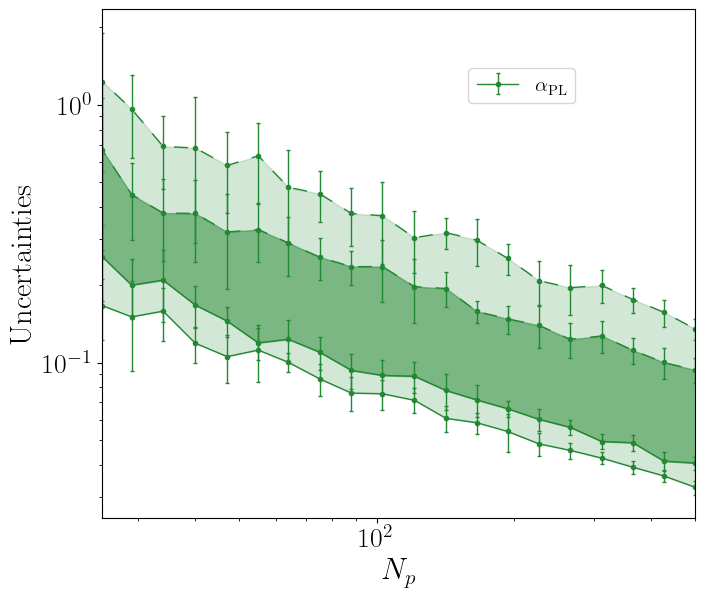

In [8]:
# Choose the parameter you want to plot (0 to 5 for SIGW+PL)
parameter_index = 0

if not parameter_labels:
    parameter_labels = signal_model.parameter_labels

colors = [my_colormap["green"],
          my_colormap["red"], 
          my_colormap["purple"], 
          my_colormap["yellow"], 
          my_colormap["blue"] 
          ]

fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(left=0.133, bottom=0.123, right=0.98, top=0.97, wspace=None, hspace=None)
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "22"
plt.errorbar(pulsar_range, mean68max[:, parameter_index], std68max[:, parameter_index], label = parameter_labels[parameter_index], marker='o', linestyle='solid',linewidth=1, markersize=3, capsize=1.5, color=colors[parameter_index])
plt.errorbar(pulsar_range, mean68min[:, parameter_index], std68min[:, parameter_index], marker='o', linestyle=(6, (10, 10)),linewidth=1, markersize=3, capsize=1.5, color=colors[parameter_index])
plt.fill_between(pulsar_range, mean68max[:, parameter_index], mean68min[:, parameter_index], color=colors[parameter_index], alpha=0.5) 
plt.errorbar(pulsar_range, mean95max[:, parameter_index], std95max[:, parameter_index], marker='o', linestyle='solid',linewidth=1, markersize=3, capsize=1.5, color=colors[parameter_index])
plt.errorbar(pulsar_range, mean95min[:, parameter_index], std95min[:, parameter_index], marker='o', linestyle=(8, (10, 10)),linewidth=1, markersize=3, capsize=1.5, color=colors[parameter_index])
plt.fill_between(pulsar_range, mean95max[:, parameter_index], mean95min[:, parameter_index], color=colors[parameter_index], alpha=0.2)

plt.legend(loc = 'center left', bbox_to_anchor = (.6, .85), prop = {'size':15})
plt.xlabel('$N_{p}$', fontsize = 22)
plt.ylabel('Uncertainties', fontsize = 22)
plt.xscale('log')
plt.yscale('log')
plt.xlim(25, 500)
plt.show()
